In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Import Texas covid activity (deaths) 2020-2021 
dataset = pd.read_csv('newdeathstx.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,DATE,New Deaths
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
564,565,58
565,566,28
566,567,37
567,568,100


In [34]:
#Splitting the dataset to Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .45, random_state = 0)

In [35]:
#Training the model on the Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
#Predicting the Test Set Result
y_pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [0.11013465]
Mean squared error: 15709.56
Coefficient of determination: 0.03


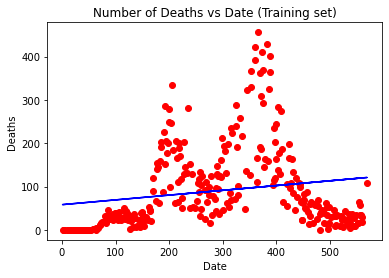

In [37]:
#Visualising Training Set Result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Deaths vs Date (Training set)')
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.savefig('ndtrain.png', dpi=600)

plt.show()

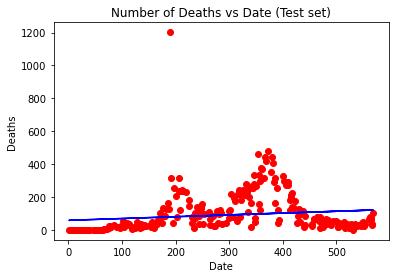

In [38]:
#Visualising Test Set Result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Deaths vs Date (Test set)')
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.savefig('ndtest.png', dpi=600)

plt.show()

In [39]:
predicted_value = regressor.predict([[250]])
predicted_value = np.floor(predicted_value)
print(predicted_value)

[85.]


In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[0.11013465]
58.26882884874775
